In [ ]:
# Start writing code here...from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')


Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

"""
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
"""
spotify_data_cleaned = spotify_songs
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    track_album_release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
spotify_data_cleaned.track_album_release_year = spotify_data_cleaned.track_album_release_year.astype("int64")
"""
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]
"""


'\nmask = (spotify_data_cleaned.track_popularity > 0)\nspotify_data_cleaned = spotify_data_cleaned.loc[mask]\n'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalisation(data):
    columns = ["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"]
    data_norme = data[columns]
    scaler = MinMaxScaler(feature_range=(0,1))
    data_norme = pd.DataFrame(scaler.fit_transform(data_norme), columns=columns)
    return data_norme


**Moyenne des données pour chaque playlist et normalisation**

In [ ]:
playlist = spotify_data_cleaned.groupby(['playlist_name'])["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"].mean()


playlist_normed = pd.DataFrame(normalisation(playlist))
playlist_normed.index = playlist.index


playlist_normed["playlist_genre"] = ""



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:

def ajout_genre() :
    c = 0
    for i in playlist_normed.index :
        df = spotify_data_cleaned.loc[spotify_data_cleaned["playlist_name"] == i]
        playlist_normed['playlist_genre'].iloc[c] = df['playlist_genre'].iloc[0]
        c+=1

ajout_genre() 
playlist_normed


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,playlist_genre
playlist_name,,,,,,,,,,,,,
"""Permanent Wave""",0.418955,0.740951,0.690134,0.693573,0.049566,0.109017,0.134061,0.056671,0.890933,0.607933,0.493963,0.396098,rock
10er Playlist,0.827012,0.783361,0.667151,0.906427,0.208123,0.197775,0.016833,0.054013,0.600701,0.638147,0.366928,0.869493,pop
1987-1997 OLD SKOOL JAMZ,0.310404,0.814908,0.667366,0.800322,0.100405,0.200622,0.008778,0.036444,0.795910,0.581887,0.502109,0.512770,r&b
2000's hard rock,0.584681,0.368720,0.953935,0.949428,0.206255,0.000000,0.103596,0.116160,0.528281,0.898566,0.399206,0.611022,rock
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - 2018 - 2019 - 2020 TOP HITS,0.807191,0.768148,0.645931,0.909005,0.198705,0.209437,0.000690,0.106911,0.614716,0.634919,0.309571,0.898398,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
💊ELECTRO-HOUSE-TECH💊,0.380454,0.926707,0.783650,0.828438,0.192476,0.033494,0.665749,0.028678,0.437832,0.720218,0.589294,0.934647,edm
🔊BASSBOOSTED🔊⚡ELECTRO HOUSE⚡🔥EDM CAR MUSIC2018/2019🔥,0.454610,0.880228,0.724533,0.866544,0.286564,0.168423,0.214862,0.115558,0.365156,0.717827,0.282782,0.941297,edm
"🔥💵 Hip Hop, Rap, Heavy 808's - New School",0.367156,0.893294,0.548391,0.852695,0.647603,0.202065,0.000977,0.096947,0.396017,0.791428,0.338426,0.929065,rap


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def KNN(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)

    n_neighbors_list = np.unique(np.round(np.geomspace(1, 400, 100)).astype(int))
    param_grid = {"n_neighbors": n_neighbors_list}

    cls = KNeighborsClassifier()

    search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
    search.fit(xx, yy)
    kopt = search.best_params_
    #print(kopt)
    
    knn = KNeighborsClassifier(n_neighbors = kopt["n_neighbors"])
    #training
    knn.fit(x_train,y_train)
    #print(knn.score(x_test,y_test))
    return (knn.score(x_test,y_test))

In [ ]:
playlist_normed2 = playlist_normed.drop(columns="playlist_genre",axis=1)

In [ ]:
KNN(playlist_normed2, playlist_normed)

0.6862745098039216

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

score one vs one class :  0.7843137254901961


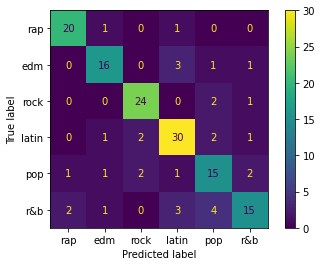

In [ ]:
def OVOClassifier(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)
    clf = OneVsOneClassifier(
    LinearSVC(random_state=0)).fit(x_train, y_train)
    return clf.score(x_test,y_test), confusion_matrix(y_test, clf.predict(x_test),labels=['rap', 'edm', 'rock','latin','pop','r&b'])
score, cm = OVOClassifier(playlist_normed2, playlist_normed)
print("score one vs one class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

score one vs one class :  0.6993464052287581


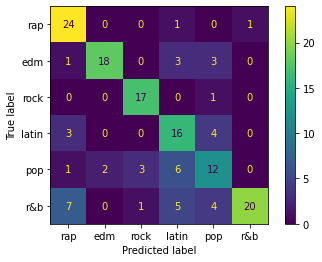

In [ ]:
print("score one vs one class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

In [ ]:
def OVRClassifier(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)
    clf = OneVsRestClassifier(SVC()).fit(x_train, y_train)
    return clf.score(x_test,y_test), confusion_matrix(y_test, clf.predict(x_test),labels=['rap', 'edm', 'rock','latin','pop','r&b'])

score, cm = OVRClassifier(playlist_normed2, playlist_normed)

score one vs rest class :  0.6928104575163399


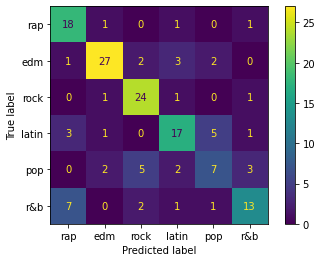

In [ ]:
print("score one vs rest class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

In [ ]:
def LDA(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)
    lda = LinearDiscriminantAnalysis()
    lda.fit(x_train,y_train)
    return lda.score(x_test,y_test), confusion_matrix(y_test, lda.predict(x_test),labels=['rap', 'edm', 'rock','latin','pop','r&b'])
score, cm = LDA(playlist_normed2, playlist_normed)

LDA class :  0.6797385620915033


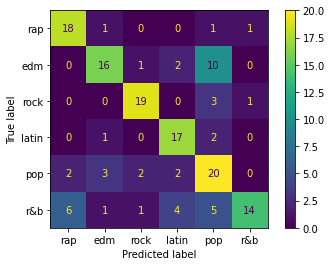

In [ ]:
print("LDA class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

In [ ]:
def QDA(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(x_train,y_train)
    return qda.score(x_test,y_test), confusion_matrix(y_test, qda.predict(x_test),labels=['rap', 'edm', 'rock','latin','pop','r&b'])
score, cm = QDA(playlist_normed2, playlist_normed)

QDA class :  0.6797385620915033


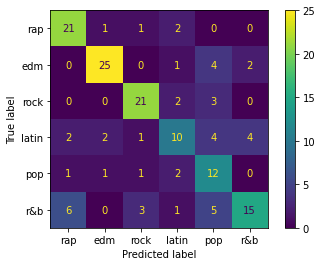

In [ ]:
print("QDA class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

In [ ]:
def GNB(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    x_train, x_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)
    gnb = GaussianNB()
    gnb.fit(x_train,y_train)
    return gnb.score(x_test,y_test), confusion_matrix(y_test, gnb.predict(x_test),labels=['rap', 'edm', 'rock','latin','pop','r&b'])
score, cm = GNB(playlist_normed2, playlist_normed)

GNB class :  0.6666666666666666


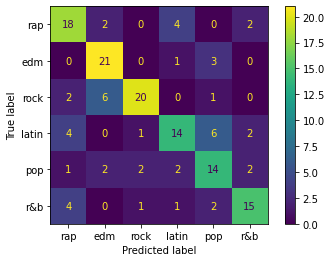

In [ ]:
print("GNB class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

In [ ]:
import random
score_lda = []
score_qda = []
score_gnb = []
score_1v1 = []
score_1vsRest = []
score_knn = []

#ligne suivante à mettre en com si on veut juste regarder les playlists
#playlist_normed2 = normalisation(spotify_data_cleaned)
#playlist_normed = spotify_data_cleaned
for rs in range(50):
    score, cm = LDA(playlist_normed2, playlist_normed)
    score_lda.append(score)

    score, cm = QDA(playlist_normed2, playlist_normed)
    score_qda.append(score)
 
    score, cm = GNB(playlist_normed2, playlist_normed)
    score_gnb.append(score)

    score, cm = OVOClassifier(playlist_normed2, playlist_normed)
    score_1v1.append(score)


    score, cm = OVRClassifier(playlist_normed2, playlist_normed)
    score_1vsRest.append(score)
    print(rs)


    score = KNN(playlist_normed2, playlist_normed)
    score_knn.append(score)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
d = {
    'lda' : score_lda,
    'qda' : score_qda,
    'gnb' : score_gnb,
    '1v1' : score_1v1,
    '1vr' : score_1vsRest,
    'knn' : score_knn
}
predict_result = pd.DataFrame(data=d)
predict_result

,lda,qda,gnb,1v1,1vr,knn
0,0.647059,0.686275,0.686275,0.699346,0.732026,0.699346
1,0.712418,0.732026,0.699346,0.692810,0.679739,0.712418
2,0.738562,0.627451,0.712418,0.725490,0.660131,0.666667
3,0.699346,0.718954,0.725490,0.745098,0.692810,0.692810
4,0.705882,0.725490,0.692810,0.699346,0.686275,0.653595
5,0.640523,0.686275,0.712418,0.745098,0.673203,0.692810
6,0.699346,0.660131,0.627451,0.751634,0.699346,0.712418
7,0.692810,0.705882,0.679739,0.712418,0.653595,0.718954
8,0.692810,0.712418,0.705882,0.790850,0.738562,0.666667
9,0.732026,0.705882,0.660131,0.732026,0.666667,0.705882


<AxesSubplot:xlabel='variable', ylabel='value'>

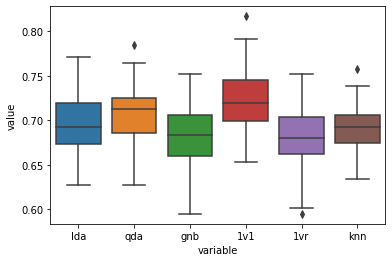

In [ ]:
sns.boxplot(x=predict_result.melt().variable,y=predict_result.melt().value)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>